<a href="https://www.kaggle.com/code/praths71018/eye-disease-detection?scriptVersionId=171072941" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eye-disease-deep-learning-dataset/dataset/labels.csv
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/623.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/208.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/473.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/333.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/537.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/45.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/369.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/56.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/654.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/89.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/20.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/275.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/212.jpg
/kaggle/input/

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

2024-04-09 01:05:39.470647: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 01:05:39.470791: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 01:05:39.629421: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
path='/kaggle/input/eye-disease-deep-learning-dataset/dataset/labels.csv'
df=pd.read_csv(path)
df.head()

,name,category,type,grade
0,1.jpg,0,4,3
1,2.jpg,0,4,3
2,3.jpg,0,2,2
3,4.jpg,0,2,1
4,5.jpg,0,1,3


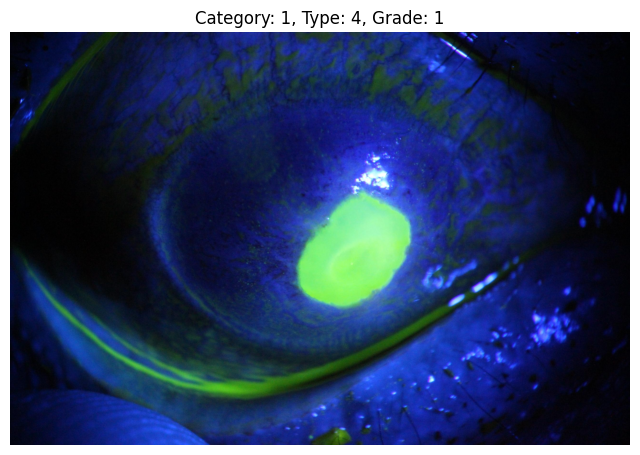

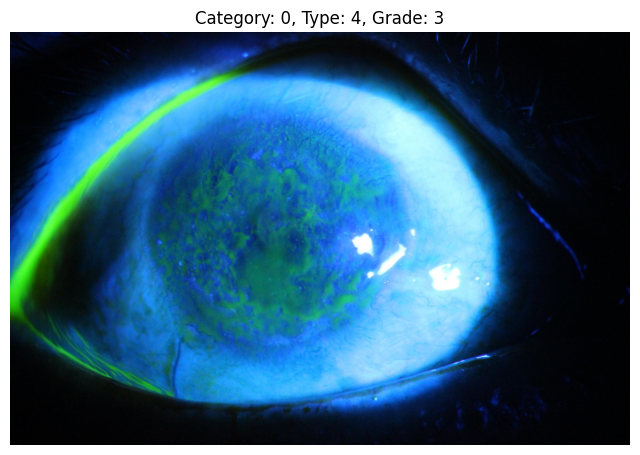

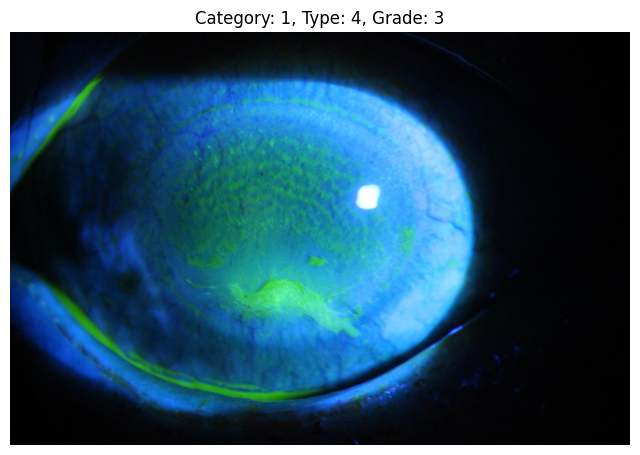

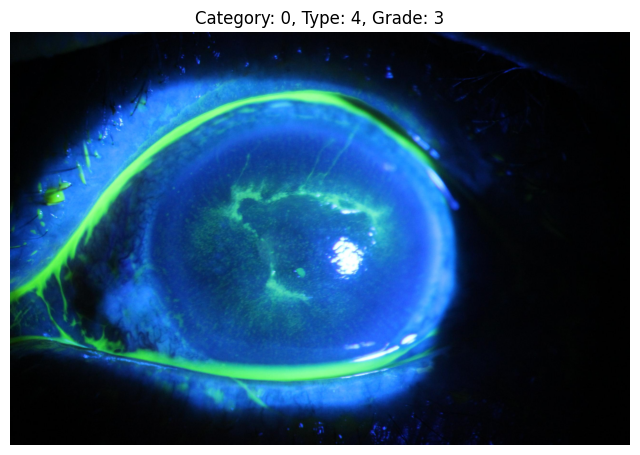

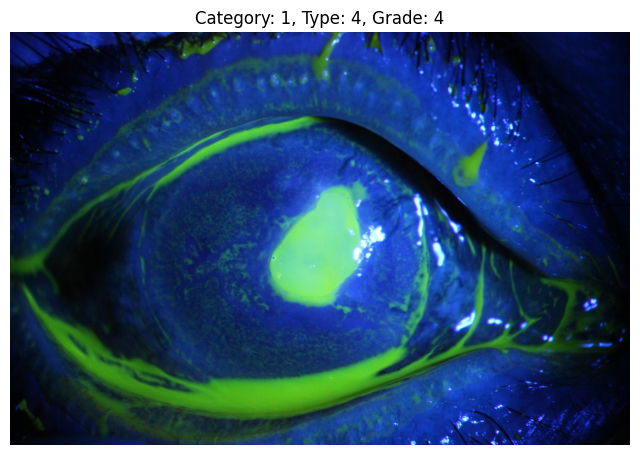

In [4]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

# Directory containing images
image_dir = "/kaggle/input/eye-disease-deep-learning-dataset/dataset/images"

# Load dataset
csv_file_path = "/kaggle/input/eye-disease-deep-learning-dataset/dataset/labels.csv"
dataset = pd.read_csv(csv_file_path)

# Select five random images
random_image_indices = random.sample(range(len(dataset)), 5)

# Display the selected images with labels
for idx in random_image_indices:
    image_path = os.path.join(image_dir, dataset.loc[idx, 'name'])
    image = mpimg.imread(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(f"Category: {dataset.loc[idx, 'category']}, Type: {dataset.loc[idx, 'type']}, Grade: {dataset.loc[idx, 'grade']}")
    plt.axis('off')
    plt.show()


In [5]:
Type_of_category=df['category'].unique()
Type_of_category

array([0, 1, 2])

In [6]:
Type_of_diseases=df['type'].unique()
Type_of_diseases

array([4, 2, 1, 0, 3])

In [7]:
Type_of_grade=df['grade'].unique()
Type_of_grade

array([3, 2, 1, 0, 4])

In [8]:
dic={}
for i in Type_of_diseases:
    dic[i]=df['type'].value_counts()[i]
    
dic_category={}
for j in Type_of_category:
    dic_category[j]=df['category'].value_counts()[j]
    
dic_grade={}
for k in Type_of_grade:
    dic_grade[k]=df['grade'].value_counts()[k]

print(dic)
print(dic_category)
print(dic_grade)

{4: 548, 2: 40, 1: 78, 0: 36, 3: 10}
{0: 358, 1: 263, 2: 91}
{3: 273, 2: 203, 1: 98, 0: 36, 4: 102}


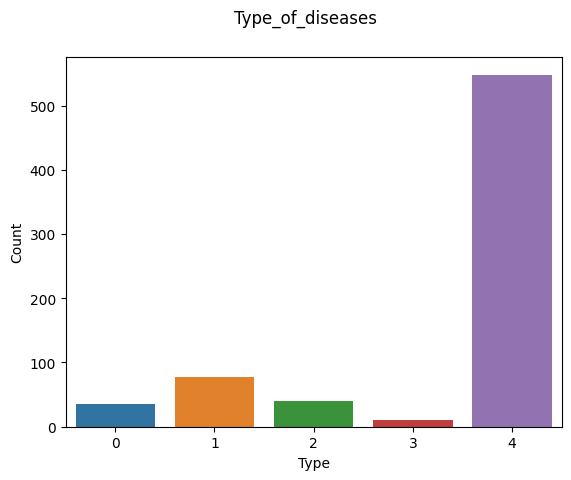

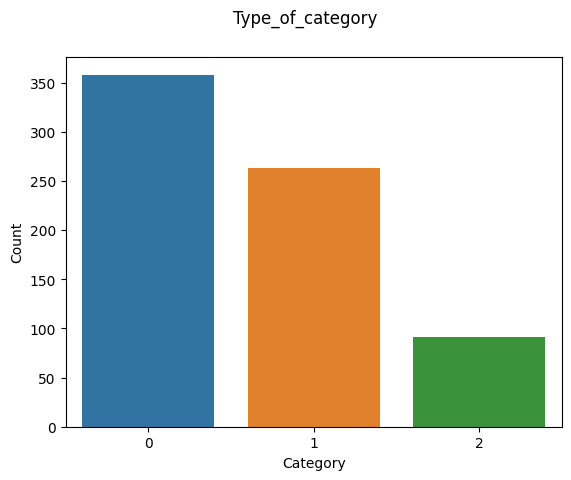

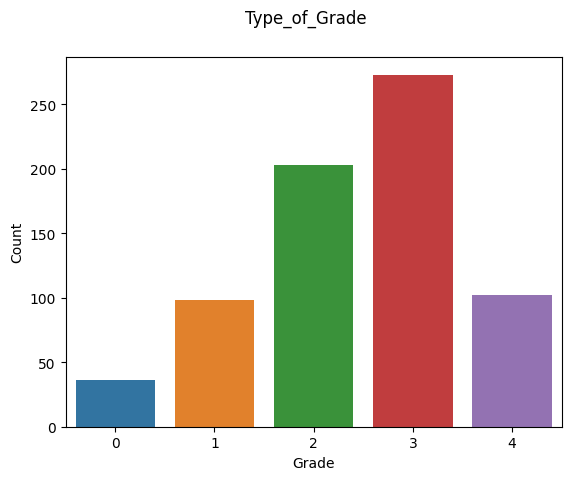

In [9]:
sns.barplot(x = list(dic.keys()), y = list(dic.values()))
plt.suptitle("Type_of_diseases")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_category.keys()), y = list(dic_category.values()))
plt.suptitle("Type_of_category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_grade.keys()), y = list(dic_grade.values()))
plt.suptitle("Type_of_Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

In [10]:
import cv2
import pandas as pd
import numpy as np
import os

# Load the dataset
dataset = df

# Function to augment images
def augment_image(image_path):
    image = cv2.imread(image_path)
    # Apply augmentation techniques here
    # For example, you can add rotation, flipping, scaling, etc.
    augmented_images = [image]  # Initial image
    # Example: Rotate the image
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    augmented_images.append(rotated_image)
    return augmented_images

# Define paths
input_folder = "/kaggle/input/eye-disease-deep-learning-dataset/dataset/images"  # Folder containing original images
output_folder = "augmented_images"  # Folder to store augmented images

# Create output folder if not exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Augment images and append to the dataset
augmented_dataset = []
for index, row in dataset.iterrows():
    image_name = row['name']
    image_path = os.path.join(input_folder, image_name)
    augmented_images = augment_image(image_path)
    for augmented_image in augmented_images:
        augmented_image_name = f"{os.path.splitext(image_name)[0]}_augmented.jpg"
        augmented_image_path = os.path.join(output_folder, augmented_image_name)
        cv2.imwrite(augmented_image_path, augmented_image)
        augmented_row = {
            'name': augmented_image_name,
            'category': row['category'],
            'type': row['type'],
            'grade': row['grade']
        }
        augmented_dataset.append(augmented_row)

# Convert augmented dataset to DataFrame
augmented_dataset_df = pd.DataFrame(augmented_dataset)

# Append augmented dataset to original dataset
combined_dataset = pd.concat([dataset, augmented_dataset_df], ignore_index=True)

# Save combined dataset to CSV
combined_dataset.to_csv("combined_dataset.csv", index=False)


In [11]:
import os
import shutil

# Source and destination paths
source_images_folder = "/kaggle/input/eye-disease-deep-learning-dataset/dataset/images"
destination_images_folder = "/kaggle/working/augmented_images"

# Copy images
if os.path.exists(source_images_folder) and os.path.isdir(source_images_folder):
    if not os.path.exists(destination_images_folder):
        os.makedirs(destination_images_folder)
    # Copy contents of source_images_folder to destination_images_folder
    for file_name in os.listdir(source_images_folder):
        source_file = os.path.join(source_images_folder, file_name)
        destination_file = os.path.join(destination_images_folder, file_name)
        shutil.copyfile(source_file, destination_file)
else:
    print("Source images folder not found.")


In [12]:
df=combined_dataset
df

,name,category,type,grade
0,1.jpg,0,4,3
1,2.jpg,0,4,3
2,3.jpg,0,2,2
3,4.jpg,0,2,1
4,5.jpg,0,1,3
...,...,...,...,...
2131,710_augmented.jpg,2,1,4
2132,711_augmented.jpg,2,3,4
2133,711_augmented.jpg,2,3,4
2134,712_augmented.jpg,2,4,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      2136 non-null   object
 1   category  2136 non-null   int64 
 2   type      2136 non-null   int64 
 3   grade     2136 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 66.9+ KB


In [14]:
train_image='/kaggle/working/augmented_images'
train_image

'/kaggle/working/augmented_images'

In [15]:
df.nunique()

name        1424
category       3
type           5
grade          5
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      2136 non-null   object
 1   category  2136 non-null   int64 
 2   type      2136 non-null   int64 
 3   grade     2136 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 66.9+ KB


In [17]:
Type_of_category=df['category'].unique()
Type_of_category

array([0, 1, 2])

In [18]:
Type_of_diseases=df['type'].unique()
Type_of_diseases

array([4, 2, 1, 0, 3])

In [19]:
Type_of_grade=df['grade'].unique()
Type_of_grade

array([3, 2, 1, 0, 4])

In [20]:
dic={}
for i in Type_of_diseases:
    dic[i]=df['type'].value_counts()[i]
    
dic_category={}
for j in Type_of_category:
    dic_category[j]=df['category'].value_counts()[j]
    
dic_grade={}
for k in Type_of_grade:
    dic_grade[k]=df['grade'].value_counts()[k]

print(dic)
print(dic_category)
print(dic_grade)

{4: 1644, 2: 120, 1: 234, 0: 108, 3: 30}
{0: 1074, 1: 789, 2: 273}
{3: 819, 2: 609, 1: 294, 0: 108, 4: 306}


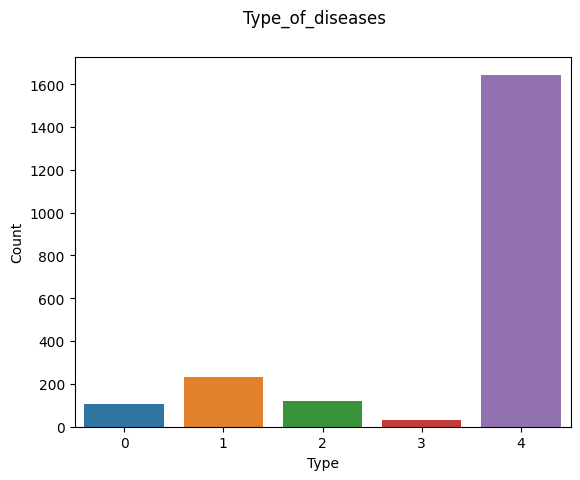

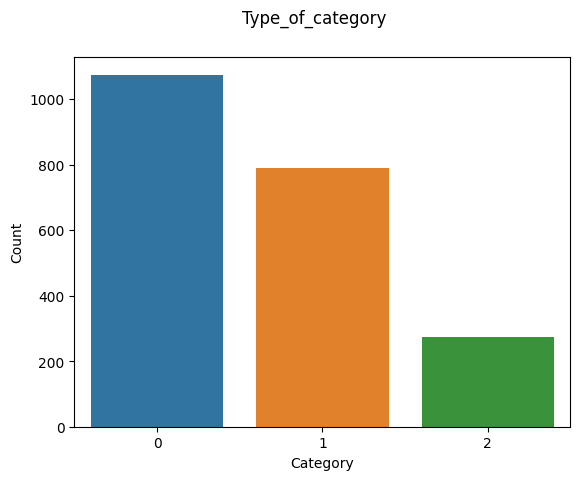

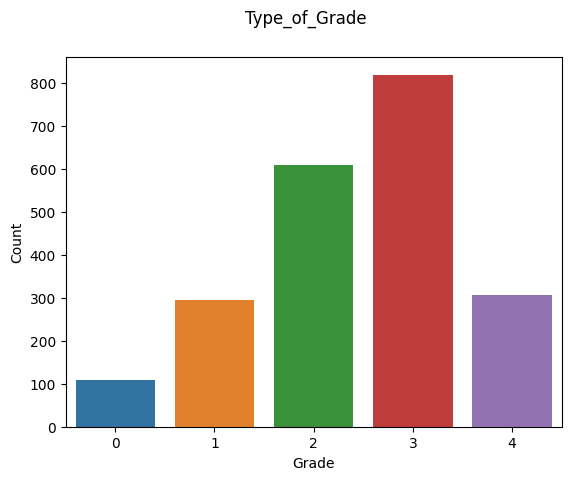

In [21]:
sns.barplot(x = list(dic.keys()), y = list(dic.values()))
plt.suptitle("Type_of_diseases")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_category.keys()), y = list(dic_category.values()))
plt.suptitle("Type_of_category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_grade.keys()), y = list(dic_grade.values()))
plt.suptitle("Type_of_Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

## Category

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tqdm import tqdm

In [23]:
train_images = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('/kaggle/working/augmented_images/'+df['name'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    img = img/255
#     train_images.append(img)
    train_images.append(img)

X = np.array(train_images)
X[0:10]

100%|██████████| 2136/2136 [00:44<00:00, 47.73it/s]


array([[[[0.00784314, 0.01568628, 0.0627451 ],
         [0.00784314, 0.01568628, 0.0627451 ],
         [0.01176471, 0.01960784, 0.06666667],
         ...,
         [0.00784314, 0.02352941, 0.05882353],
         [0.00392157, 0.01960784, 0.0627451 ],
         [0.00392157, 0.01960784, 0.0627451 ]],

        [[0.00784314, 0.01568628, 0.0627451 ],
         [0.01176471, 0.01960784, 0.06666667],
         [0.01176471, 0.01960784, 0.06666667],
         ...,
         [0.01960784, 0.02745098, 0.11764706],
         [0.00784314, 0.02352941, 0.07058824],
         [0.00784314, 0.02352941, 0.06666667]],

        [[0.01568628, 0.01568628, 0.0627451 ],
         [0.01960784, 0.02745098, 0.07843138],
         [0.01960784, 0.02745098, 0.07843138],
         ...,
         [0.01568628, 0.02745098, 0.16470589],
         [0.00392157, 0.02352941, 0.10196079],
         [0.01176471, 0.01960784, 0.06666667]],

        ...,

        [[0.00784314, 0.02745098, 0.05098039],
         [0.01176471, 0.02745098, 0.0627451 ]

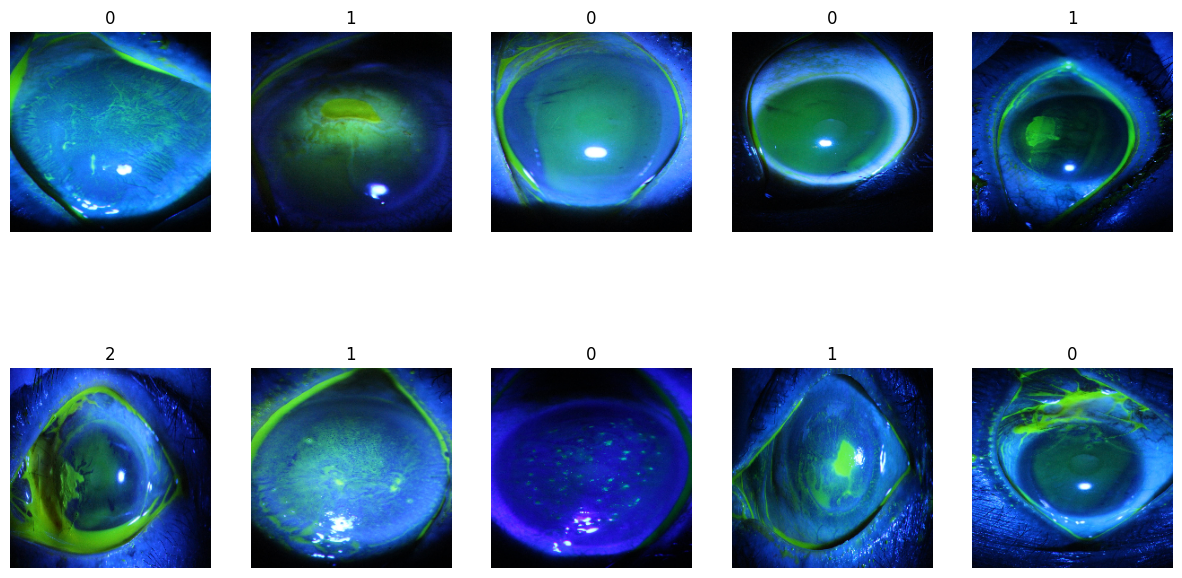

In [24]:
import random

# Select 10 random indices
sample_indices = random.sample(range(len(train_images)), 10)

# Display the images with their corresponding labels
plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[idx])
    plt.title(df['category'][idx])  # Accessing label directly from DataFrame
    plt.axis('off')
plt.show()


In [25]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['category'].values, test_size=0.3, random_state=42)

In [26]:
# Define the CNN architecture
input_layer = Input(shape=(224, 224, 3))

In [27]:
from tensorflow.keras.regularizers import l2

# Convolutional layers
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)


# Flatten layer
flatten = Flatten()(pool2)

# Fully connected layers with L2 regularization
dense1 = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(flatten)
dropout1 = Dropout(0.7)(dense1)
dense2 = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(dropout1)
dropout2 = Dropout(0.5)(dense2)

# Output layer
output_layer = Dense(len(df['category'].unique()), activation='softmax')(dropout2)

In [28]:
# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    95,552,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,703,491 (365.08 MB)

 Trainable params: 95,703,491 (365.08 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),verbose=1)

Epoch 1/10
 2/47 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.3906 - loss: 19.8700  

I0000 00:00:1712624994.387120      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712624994.404605      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.4532 - loss: 14.1825

W0000 00:00:1712625015.784208      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 488ms/step - accuracy: 0.4541 - loss: 14.0863 - val_accuracy: 0.5211 - val_loss: 4.2121
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.5585 - loss: 3.5772 - val_accuracy: 0.6724 - val_loss: 2.5295
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6183 - loss: 2.5349 - val_accuracy: 0.6880 - val_loss: 2.1739
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.6875 - loss: 2.1522 - val_accuracy: 0.6615 - val_loss: 2.0966
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6313 - loss: 2.0882 - val_accuracy: 0.7083 - val_loss: 1.9675
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.6859 - loss: 1.9217 - val_accuracy: 0.6599 - val_loss: 1.8431
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6556 - loss: 1.8139 - val_accuracy: 0.6786 - val_loss: 1.6880
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.6826 - loss: 1.7027 - val_accuracy: 0.7145 - val_loss:

In [30]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:", train_accuracy)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.7003344297409058
Test Accuracy: 0.6786271333694458


In [31]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']


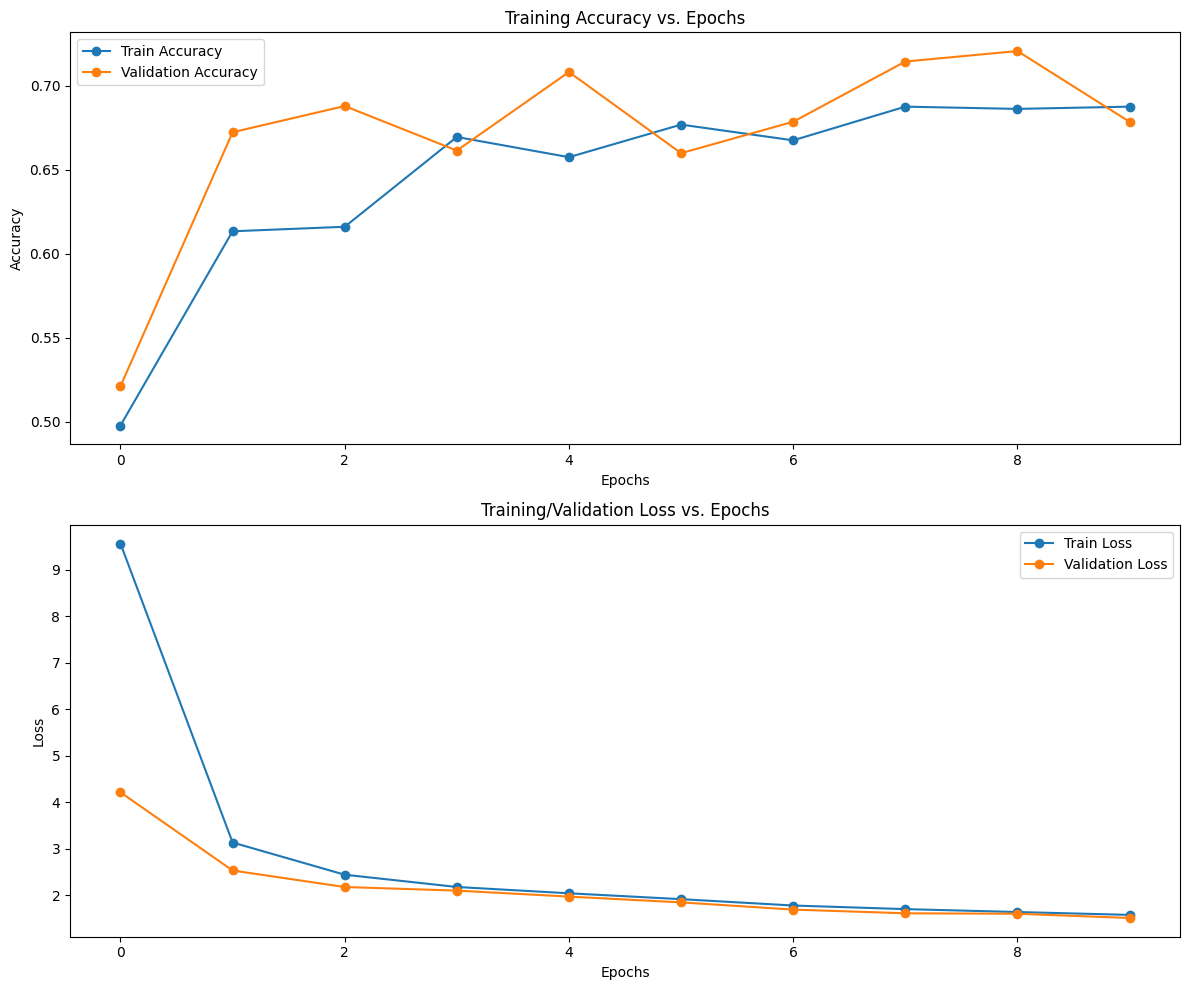

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()


In [33]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1,
       0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2,
       1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 2,
       0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2,

In [34]:
y_pred=model.predict(X_test) 
y_pred

13/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

W0000 00:00:1712625058.217011      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


array([[0.30141246, 0.48806527, 0.21052234],
       [0.5888439 , 0.29398203, 0.11717408],
       [0.2310703 , 0.4997113 , 0.2692183 ],
       ...,
       [0.6871232 , 0.23473285, 0.07814391],
       [0.736776  , 0.20601639, 0.05720761],
       [0.77892447, 0.17210783, 0.04896775]], dtype=float32)

In [35]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [36]:
y_pred_train=model.predict(X_train) 
y_pred_train

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


array([[0.7935728 , 0.16166602, 0.04476113],
       [0.5495781 , 0.3222739 , 0.12814799],
       [0.00536154, 0.6133623 , 0.38127616],
       ...,
       [0.8387665 , 0.12859124, 0.03264223],
       [0.65241057, 0.2666674 , 0.08092204],
       [0.8176222 , 0.14686315, 0.03551466]], dtype=float32)

In [37]:
y_pred_classes_train = np.argmax(y_pred_train, axis=1)
y_pred_classes_train

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
class_counts = np.bincount(y_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 764 instances
Class 1: 532 instances
Class 2: 199 instances


In [39]:
class_counts = np.bincount(y_pred_classes_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 1005 instances
Class 1: 489 instances
Class 2: 1 instances


In [40]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       310
           1       0.70      0.56      0.62       257
           2       0.00      0.00      0.00        74

    accuracy                           0.68       641
   macro avg       0.46      0.50      0.47       641
weighted avg       0.60      0.68      0.63       641



## Type

In [41]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, df['type'].values, test_size=0.3, random_state=42)

In [42]:
from tensorflow.keras.regularizers import l2

input_layer1 = Input(shape=(224, 224, 3))
 
# Convolutional layers
conv01 = Conv2D(16, (3, 3), activation='relu')(input_layer1)
pool01 = MaxPooling2D(pool_size=(2, 2))(conv01)
conv11 = Conv2D(32, (3, 3), activation='relu')(pool01)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv21 = Conv2D(64, (3, 3), activation='relu')(pool11)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv31 = Conv2D(128, (3, 3), activation='relu')(pool21)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv31)

# Flatten layer
flatten1 = Flatten()(pool21)

# Fully connected layers with L2 regularization
dense11 = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(flatten1)
dropout11 = Dropout(0.5)(dense11)
# dense21 = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(dropout11)
# dropout21 = Dropout(0.3)(dense21)


# Output layer
output_layer1 = Dense(len(df['type'].unique()), activation='softmax')(dropout11)

In [43]:
# Create the model
model1 = Model(inputs=input_layer1, outputs=output_layer1)

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,537,701 (36.38 MB)

 Trainable params: 9,537,701 (36.38 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model1.fit(X_train1, y_train1, epochs=9, batch_size=64, validation_data=(X_test1, y_test1),verbose=1)

Epoch 1/9
 2/24 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.2578 - loss: 11.1910 

W0000 00:00:1712625079.243557      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/step - accuracy: 0.6628 - loss: 6.6916

W0000 00:00:1712625097.930279      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712625099.652599      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 936ms/step - accuracy: 0.6656 - loss: 6.5872 - val_accuracy: 0.7832 - val_loss: 1.3324
Epoch 2/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7635 - loss: 1.2386 - val_accuracy: 0.7832 - val_loss: 0.8284
Epoch 3/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7460 - loss: 0.9072 - val_accuracy: 0.7832 - val_loss: 0.7973
Epoch 4/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7599 - loss: 0.8120 - val_accuracy: 0.7847 - val_loss: 0.7905
Epoch 5/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7784 - loss: 0.8025 - val_accuracy: 0.7894 - val_loss: 0.7729
Epoch 6/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7674 - loss: 0.8453 - val_accuracy: 0.7660 - val_loss: 0.8691
Epoch 7/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7751 - loss: 0.8046 - val_accuracy: 0.7894 - val_loss: 0.7299
Epoch 8/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7823 - loss: 0.7334 - val_accuracy: 0.7956 - val_loss: 0.7542


In [45]:
# Evaluate the model
train_loss1, train_accuracy1 = model1.evaluate(X_train1, y_train1, verbose=0)
print("Training Accuracy:", train_accuracy1)
test_loss1, test_accuracy1 = model1.evaluate(X_test1, y_test1, verbose=0)
print("Test Accuracy:", test_accuracy1)

W0000 00:00:1712625117.762123      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712625118.736744      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Training Accuracy: 0.7658863067626953
Test Accuracy: 0.7878314852714539


In [46]:
y_test1

array([4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 2, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 2, 4, 3,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4,
       4, 4, 4, 4, 2, 1, 4, 4, 4, 4, 2, 4, 4, 4, 0, 4, 3, 4, 4, 1, 4, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 2, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 2, 4, 4, 4, 1, 0, 4, 4, 4, 4, 4, 4, 1, 2, 4, 4, 4, 4, 1, 4,
       4, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 2, 4, 4, 4, 1, 4, 3, 4, 2, 4, 3,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,

In [47]:
y_pred1=model1.predict(X_test1) 
y_pred1

18/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

W0000 00:00:1712625122.293727      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


array([[0.02204062, 0.06773208, 0.09702261, 0.01742898, 0.7957758 ],
       [0.07442384, 0.08426938, 0.05177389, 0.02087411, 0.76865876],
       [0.04415284, 0.08913691, 0.08200858, 0.01467233, 0.77002937],
       ...,
       [0.04403756, 0.04159848, 0.05913913, 0.01520019, 0.84002465],
       [0.0446909 , 0.06728261, 0.06056505, 0.02713982, 0.80032164],
       [0.10893346, 0.1151612 , 0.09417956, 0.03847334, 0.64325243]],
      dtype=float32)

In [48]:
y_pred_classes1 = np.argmax(y_pred1, axis=1)
y_pred_classes1

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,

In [49]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test1,y_pred_classes1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       1.00      0.05      0.09        61
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00         9
           4       0.79      1.00      0.88       502

    accuracy                           0.79       641
   macro avg       0.36      0.21      0.19       641
weighted avg       0.71      0.79      0.70       641



In [50]:
y_pred1_train=model1.predict(X_train1) 
y_pred1

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


W0000 00:00:1712625126.748643      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


array([[0.02204062, 0.06773208, 0.09702261, 0.01742898, 0.7957758 ],
       [0.07442384, 0.08426938, 0.05177389, 0.02087411, 0.76865876],
       [0.04415284, 0.08913691, 0.08200858, 0.01467233, 0.77002937],
       ...,
       [0.04403756, 0.04159848, 0.05913913, 0.01520019, 0.84002465],
       [0.0446909 , 0.06728261, 0.06056505, 0.02713982, 0.80032164],
       [0.10893346, 0.1151612 , 0.09417956, 0.03847334, 0.64325243]],
      dtype=float32)

In [51]:
y_pred_classes1_train = np.argmax(y_pred1_train, axis=1)
y_pred_classes1_train

array([4, 4, 4, ..., 4, 4, 4])

In [52]:
class_counts = np.bincount(y_pred_classes1_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 0 instances
Class 1: 4 instances
Class 2: 0 instances
Class 3: 0 instances
Class 4: 1491 instances


In [53]:
y_train1

array([4, 4, 4, ..., 2, 4, 0])

In [54]:
class_counts = np.bincount(y_train1)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 75 instances
Class 1: 173 instances
Class 2: 84 instances
Class 3: 21 instances
Class 4: 1142 instances


## Grade

In [55]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, df['grade'].values, test_size=0.3, random_state=42)

In [56]:
from tensorflow.keras.regularizers import l2

input_layer2 = Input(shape=(224, 224, 3))

# Convolutional layers
conv12 = Conv2D(32, (3, 3), activation='relu')(input_layer2)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
conv22 = Conv2D(64, (3, 3), activation='relu')(pool12)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)

# Flatten layer
flatten2 = Flatten()(pool22)

# Fully connected layers with L2 regularization
dense12 = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(flatten2)
dropout12 = Dropout(0.5)(dense12)
dense22 = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(dropout12)
dropout22 = Dropout(0.5)(dense22)

# Output layer
output_layer2= Dense(len(df['grade'].unique()), activation='softmax')(dropout22)

In [57]:
# Create the model
model2 = Model(inputs=input_layer2, outputs=output_layer2)

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    95,552,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,704,005 (365.08 MB)

 Trainable params: 95,704,005 (365.08 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model2.fit(X_train2, y_train2, epochs=10, batch_size=32, validation_data=(X_test2, y_test2),verbose=1)

Epoch 1/10
 2/47 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.1719 - loss: 18.2896

W0000 00:00:1712625137.336525      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.2892 - loss: 12.6693

W0000 00:00:1712625151.197688      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - accuracy: 0.2903 - loss: 12.5897 - val_accuracy: 0.3916 - val_loss: 4.5860
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.4094 - loss: 3.9888 - val_accuracy: 0.3978 - val_loss: 2.9536
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.3858 - loss: 2.8917 - val_accuracy: 0.3838 - val_loss: 2.6539
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.4012 - loss: 2.5609 - val_accuracy: 0.3822 - val_loss: 2.4776
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.4080 - loss: 2.4306 - val_accuracy: 0.3931 - val_loss: 2.2838
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.3920 - loss: 2.3220 - val_accuracy: 0.3807 - val_loss: 2.1942
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.4270 - loss: 2.1183 - val_accuracy: 0.3775 - val_loss: 2.1116
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.4035 - loss: 2.0568 - val_accuracy: 0.3947 - val_loss:

In [59]:
# Evaluate the model
train_loss2, train_accuracy2 = model2.evaluate(X_train2, y_train2, verbose=0)
print("Training Accuracy:", train_accuracy2)
test_loss2, test_accuracy2 = model2.evaluate(X_test2, y_test2, verbose=0)
print("Test Accuracy:", test_accuracy2)

Training Accuracy: 0.43210703134536743
Test Accuracy: 0.3915756642818451


In [60]:
y_test2

array([3, 2, 2, 3, 2, 2, 2, 4, 3, 2, 4, 1, 4, 2, 2, 3, 2, 3, 3, 3, 2, 3,
       3, 4, 3, 3, 3, 2, 3, 1, 3, 3, 2, 3, 4, 1, 3, 4, 3, 4, 3, 3, 2, 3,
       2, 3, 3, 4, 3, 1, 3, 2, 2, 3, 2, 2, 2, 4, 4, 3, 1, 1, 3, 2, 3, 4,
       3, 2, 3, 2, 0, 3, 2, 3, 2, 2, 2, 4, 3, 1, 2, 0, 2, 3, 3, 2, 4, 2,
       1, 3, 3, 2, 2, 3, 2, 3, 1, 1, 3, 3, 4, 3, 2, 3, 3, 3, 2, 3, 1, 3,
       2, 3, 3, 3, 4, 1, 2, 3, 3, 3, 2, 1, 2, 4, 3, 3, 3, 3, 2, 4, 2, 3,
       3, 2, 2, 4, 4, 3, 2, 3, 3, 0, 3, 2, 2, 2, 0, 3, 4, 1, 4, 3, 3, 2,
       1, 2, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3, 1, 1, 1, 2, 1, 2, 4, 4,
       3, 3, 3, 4, 3, 4, 2, 2, 1, 1, 3, 3, 2, 3, 0, 2, 3, 3, 2, 1, 2, 3,
       2, 1, 3, 4, 3, 2, 4, 2, 2, 4, 2, 2, 3, 3, 3, 3, 2, 4, 4, 3, 3, 3,
       3, 4, 3, 0, 1, 2, 0, 0, 2, 2, 3, 2, 3, 1, 4, 3, 2, 4, 3, 3, 3, 4,
       3, 3, 2, 3, 1, 2, 4, 0, 4, 2, 4, 2, 3, 3, 4, 2, 3, 3, 3, 3, 4, 4,
       2, 4, 4, 1, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 4,
       2, 1, 3, 3, 4, 3, 4, 2, 1, 3, 1, 3, 3, 3, 4,

In [61]:
y_pred2=model2.predict(X_test2) 
y_pred2

14/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

W0000 00:00:1712625193.235913      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


array([[0.02848293, 0.10706645, 0.3038598 , 0.4320141 , 0.12857673],
       [0.06667868, 0.13944213, 0.27893057, 0.43738565, 0.07756297],
       [0.04344027, 0.13838005, 0.26742312, 0.40331313, 0.14744341],
       ...,
       [0.07202885, 0.14802064, 0.278322  , 0.41609994, 0.08552862],
       [0.0580575 , 0.1330048 , 0.26293635, 0.45930958, 0.08669177],
       [0.05772057, 0.12968962, 0.27658954, 0.4660449 , 0.06995534]],
      dtype=float32)

In [62]:
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_pred_classes2

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [63]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test2,y_pred_classes2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.00      0.00      0.00        89
           2       0.47      0.04      0.07       184
           3       0.40      0.91      0.55       245
           4       0.34      0.24      0.29        90

    accuracy                           0.39       641
   macro avg       0.24      0.24      0.18       641
weighted avg       0.33      0.39      0.27       641



In [64]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt